In [52]:
# import libraries


from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage import io, transform, color
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image
import os
import cv2
import shutil

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c umor-classification

 88% 169M/193M [00:01<00:00, 143MB/s]
100% 193M/193M [00:01<00:00, 137MB/s]


In [4]:
!unzip umor-classification.zip

Archive:  umor-classification.zip
  inflating: images/images/1006.png  
  inflating: images/images/1028.png  
  inflating: images/images/1046.png  
  inflating: images/images/1062.png  
  inflating: images/images/1066.png  
  inflating: images/images/1068.png  
  inflating: images/images/1070.png  
  inflating: images/images/1073.png  
  inflating: images/images/1091.png  
  inflating: images/images/1097.png  
  inflating: images/images/1105.png  
  inflating: images/images/1127.png  
  inflating: images/images/1138.png  
  inflating: images/images/1154.png  
  inflating: images/images/1156.png  
  inflating: images/images/1159.png  
  inflating: images/images/1183.png  
  inflating: images/images/1191.png  
  inflating: images/images/1202.png  
  inflating: images/images/1218.png  
  inflating: images/images/1230.png  
  inflating: images/images/1234.png  
  inflating: images/images/1235.png  
  inflating: images/images/1240.png  
  inflating: images/images/1253.png  
  inflating: ima

# **Read image file**

In [5]:
# Load and preprocess training images
image_folder   = '/content/images/images/'

# **Read CSV file**

In [7]:
train  = pd.read_csv('trainset.csv')
test   = pd.read_csv('testset.csv')

# **Split train and test**

In [9]:
images = os.listdir(image_folder)
id_train = dict(zip(train['Id'], train['Class']))

In [10]:
# create a list for both images and labels
images_train = []
labels_train = []

In [11]:
for index, row in train.iterrows():
  im_id = row['Id']
  if im_id in id_train :
    label = id_train [im_id]
    image_path = os.path.join(image_folder, f"{im_id}.png")
    if os.path.exists(image_path):  # Check if the image file exists
        image = cv2.imread(image_path)  # Load the image using cv2

        if image is not None:  # Check if the image was loaded successfully
            images_train.append(image)
            labels_train.append(label)

train_data= np.array(images_train)
train_label = np.array(labels_train)

<ipython-input-11-81565cee5824>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_data= np.array(images_train)


In [12]:
# Get the image IDs from the test CSV
test_id = list(test['Id'])

In [13]:
image_test = []
for index, row in test.iterrows():
  image_id = row['Id']
  if image_id in test_id:
    image_path = os.path.join(image_folder, f"{image_id}.png")
    # Check if the image file exists
    if os.path.exists(image_path):
      # Load the image using cv2
      image = cv2.imread(image_path)
      image_test.append(image)

test_data = np.array(image_test)

<ipython-input-13-b37ddeeeb83b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = np.array(image_test)


# **Resize the images**

In [14]:
# train images

target_size = (200, 200)  # Replace with your desired target size

# Initialize an empty list to store resized images
resized_images = []

# Loop through each image in X_train and resize
for image in train_data:
    resized_image = cv2.resize(image, target_size)
    resized_images.append(resized_image)

# Convert the list of resized images back to a NumPy array
resized_train = np.array(resized_images)

In [15]:
# test images

target_size = (200, 200)  # Replace with your desired target size

# Initialize an empty list to store resized images
resized_images = []

# Loop through each image in X_train and resize
for image in test_data:
    resized_image = cv2.resize(image, target_size)
    resized_images.append(resized_image)

# Convert the list of resized images back to a NumPy array
resized_test = np.array(resized_images)

In [16]:
resized_train.shape, resized_test.shape

((539, 200, 200, 3), (229, 200, 200, 3))

# **Normalize images**

In [17]:
resized_train = resized_train/255

resized_test = resized_test/255

In [18]:
resized_train.shape, resized_test.shape

((539, 200, 200, 3), (229, 200, 200, 3))

# ** Feature Extraction**

## 1- HOG faetures:

In [ ]:
'''# Apply HOG
# Set HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)
block_norm = 'L2-Hys'

# Initialize lists to store HOG features
train_hog_features = []

# Loop through training images
for image in resized_train:
    gray_image = color.rgb2gray(image)
    features = hog(gray_image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block, block_norm=block_norm)
    train_hog_features.append(features)

X_train_hog = np.array(train_hog_features)'''

In [ ]:
'''# test

# Initialize lists to store HOG features
test_hog_features = []

# Loop through training images
for image in resized_test:
    gray_image = color.rgb2gray(image)
    features = hog(gray_image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block, block_norm=block_norm)
    test_hog_features.append(features)

X_test_hog = np.array(test_hog_features)'''

## 2- LBP Features:

In [19]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
import numpy as np

def compute_lbp_features(images):
    radius = 1
    n_points = 8 * radius
    lbp_features = []

    for image in images:
        gray_image = rgb2gray(image)
        lbp_image = local_binary_pattern(gray_image, n_points, radius, method="uniform")
        hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)  # Normalize the histogram
        lbp_features.append(hist)

    return np.array(lbp_features)

lbp_train_features = compute_lbp_features(resized_train)
lbp_test_features = compute_lbp_features(resized_test)

In [25]:
lbp_train_features.shape, lbp_test_features.shape

((539, 10), (229, 10))

## Wavelets transforms:

In [20]:
pip install PyWavelets

In [21]:
import pywt
from skimage.color import rgb2gray
import numpy as np

def compute_wavelet_features(images):
    wavelet_features = []

    for image in images:
        gray_image = rgb2gray(image)
        coeffs = pywt.dwt2(gray_image, "haar")  # Apply wavelet transform
        cA, (cH, cV, cD) = coeffs
        feature_vector = []
        for coef in [cA, cH, cV, cD]:
            feature_vector.extend(coef.ravel())
        wavelet_features.append(feature_vector)

    return np.array(wavelet_features)

wavelet_train_features = compute_wavelet_features(resized_train)
wavelet_test_features = compute_wavelet_features(resized_test)

In [24]:
wavelet_train_features.shape, wavelet_test_features.shape

((539, 40000), (229, 40000))

## 4- Flatten pixels:

In [22]:
train_flatten = resized_train.reshape(resized_train.shape[0], -1)
test_flatten = resized_test.reshape(resized_test.shape[0], -1)

In [23]:
train_flatten.shape, test_flatten.shape

((539, 120000), (229, 120000))

# **Concatinate Features**

In [26]:
# train

final_train_features = np.concatenate([lbp_train_features, wavelet_train_features, train_flatten], axis=1)

# test

final_test_features = np.concatenate([lbp_test_features, wavelet_test_features, test_flatten], axis=1)

In [27]:
# Convert feature list to numpy array
train_features = np.array(final_train_features)

# Convert feature list to numpy array
test_features = np.array(final_test_features)

In [26]:
'''ros = RandomOverSampler(random_state=42, sampling_strategy='auto')
ros.fit(train_features, train_label)
X_resampled, y_resampled = ros.fit_resample(train_features, train_label)'''

In [ ]:
'''from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,k_neighbors=2,  sampling_strategy='auto')
smote.fit(train_features, train_label)
X_resampled, y_resampled = smote.fit_resample(train_features, train_label)'''


"from imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(random_state=42,k_neighbors=2,  sampling_strategy='auto')\nsmote.fit(train_features, train_label)\nX_resampled, y_resampled = smote.fit_resample(train_features, train_label)"

# **Split Train and validation**

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_features,train_label  , test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((431, 160010), (108, 160010), (431,), (108,))

## **Over resampling**

In [30]:
ros = RandomOverSampler(random_state=42, sampling_strategy='auto')
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(train_features, train_label)

In [32]:
X_resampled.shape, y_resampled.shape

((900, 160010), (900,))

# **Dimensionality Reduction using PCA**

In [31]:
pca = PCA(n_components=150 )  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_resampled)
X_val_pca = pca.transform(X_test)


In [33]:
X_train_pca.shape, X_val_pca.shape

((900, 150), (108, 150))

# **Modeling**

In [49]:
svm_classifier = SVC(kernel='rbf', C=3, gamma=0.001)
svm_classifier.fit(X_train_pca, y_resampled)

# Make predictions
y_pred1 = svm_classifier.predict(X_train_pca)
y_pred2 = svm_classifier.predict(X_val_pca)


accuracy2 = accuracy_score(y_test, y_pred2)


print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix2)

# Generate classification report
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report:\n", class_report2)

Accuracy2: 0.9907407407407407
Confusion Matrix1:
 [[56  0  1]
 [ 0 30  0]
 [ 0  0 21]]
Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        57
   Malignant       1.00      1.00      1.00        30
      Normal       0.95      1.00      0.98        21

    accuracy                           0.99       108
   macro avg       0.98      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



# **Test Prediction**

In [35]:
X_test_pca = pca.transform(test_features)
predictions = svm_classifier.predict(X_test_pca)

In [36]:
test['labels'] =predictions
test['labels'].value_counts()

Benign       163
Malignant     44
Normal        22
Name: labels, dtype: int64

In [37]:
submit = pd.read_csv('/content/sample_submition4.csv')
submit

,Id,Class
0,8560,A
1,7920,A
2,8993,A
3,8126,A
4,9912,A
...,...,...
224,8343,A
225,1255,A
226,4573,A
227,3919,A


In [38]:
submit['Id'] = test['Id']
submit['Class'] =predictions # our model predictions on the test dataset
submit

,Id,Class
0,8560,Benign
1,7920,Benign
2,8993,Benign
3,8126,Normal
4,9912,Benign
...,...,...
224,8343,Malignant
225,1255,Benign
226,4573,Benign
227,3919,Benign


In [39]:
submit.to_csv('sample_submission_fatima9.csv', index=False)

# **Other Models**

## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier



# Create a k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=2)  # You can adjust the number of neighbors

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the k-NN classifier
knn_classifier.fit(X_train_pca, y_resampled)


# Make predictions
y_pred1 = knn_classifier.predict(X_train_pca)
y_pred2 = knn_classifier.predict(X_val_pca)


accuracy2 = accuracy_score(y_test, y_pred2)


print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix2)

# Generate classification report
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report:\n", class_report2)


Accuracy2: 0.9351851851851852
Confusion Matrix1:
 [[57  0  0]
 [ 5 25  0]
 [ 2  0 19]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.89      1.00      0.94        57
   Malignant       1.00      0.83      0.91        30
      Normal       1.00      0.90      0.95        21

    accuracy                           0.94       108
   macro avg       0.96      0.91      0.93       108
weighted avg       0.94      0.94      0.93       108



## DT

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(
                                                   random_state=42, max_depth=20
                                                )  # You can adjust random_state if needed

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the Decision Tree classifier
decision_tree_classifier.fit(X_train_pca, y_resampled)

# Make predictions
y_pred1 = decision_tree_classifier.predict(X_train_pca)
y_pred2 = decision_tree_classifier.predict(X_val_pca)

# Calculate accuracy
accuracy1 = accuracy_score(y_resampled, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_resampled, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix1)
print("Confusion Matrix2:\n", conf_matrix2)

# Generate classification report
class_report1 = classification_report(y_resampled, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report1:\n", class_report1)
print("Classification Report2:\n", class_report2)


Accuracy1: 1.0
Accuracy2: 1.0
Confusion Matrix1:
 [[300   0   0]
 [  0 300   0]
 [  0   0 300]]
Confusion Matrix2:
 [[57  0  0]
 [ 0 30  0]
 [ 0  0 21]]
Classification Report1:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       300
   Malignant       1.00      1.00      1.00       300
      Normal       1.00      1.00      1.00       300

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Classification Report2:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        57
   Malignant       1.00      1.00      1.00        30
      Normal       1.00      1.00      1.00        21

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



# RF

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=100,max_depth=20,
                                                  min_samples_split=2, min_samples_leaf=1,
                                                  min_weight_fraction_leaf=0.0, max_features='sqrt',
                                                  max_leaf_nodes=None, min_impurity_decrease=0.0,
                                                  bootstrap=True, oob_score=False, n_jobs=None,
                                                  verbose=0, warm_start=False,
                                                  class_weight={'Normal':4, 'Malignant':2}, ccp_alpha=0.0, max_samples=0.5)
# You can adjust n_estimators and other hyperparameters

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the Random Forest classifier
random_forest_classifier.fit(X_train_pca, y_resampled)

# Make predictions
y_pred1 = random_forest_classifier.predict(X_train_pca)
y_pred2 = random_forest_classifier.predict(X_val_pca)

# Calculate accuracy
accuracy1 = accuracy_score(y_resampled, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_resampled, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix1)
print("Confusion Matrix2:\n", conf_matrix2)

# Generate classification report
class_report1 = classification_report(y_resampled, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report1:\n", class_report1)
print("Classification Report2:\n", class_report2)

Accuracy1: 0.9988888888888889
Accuracy2: 0.9907407407407407
Confusion Matrix1:
 [[299   0   1]
 [  0 300   0]
 [  0   0 300]]
Confusion Matrix2:
 [[56  0  1]
 [ 0 30  0]
 [ 0  0 21]]
Classification Report1:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       300
   Malignant       1.00      1.00      1.00       300
      Normal       1.00      1.00      1.00       300

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Classification Report2:
               precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        57
   Malignant       1.00      1.00      1.00        30
      Normal       0.95      1.00      0.98        21

    accuracy                           0.99       108
   macro avg       0.98      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



# Extra Tree

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Create an Extra Trees classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
# You can adjust n_estimators and other hyperparameters

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the Extra Trees classifier
extra_trees_classifier.fit(X_train_pca, y_resampled)

# Make predictions
y_pred1 = extra_trees_classifier.predict(X_train_pca)
y_pred2 = extra_trees_classifier.predict(X_val_pca)

# Calculate accuracy
accuracy1 = accuracy_score(y_resampled, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_resampled, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix1)
print("Confusion Matrix2:\n", conf_matrix2)

# Generate classification report
class_report1 = classification_report(y_resampled, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report1:\n", class_report1)
print("Classification Report2:\n", class_report2)

Accuracy1: 1.0
Accuracy2: 1.0
Confusion Matrix1:
 [[300   0   0]
 [  0 300   0]
 [  0   0 300]]
Confusion Matrix2:
 [[57  0  0]
 [ 0 30  0]
 [ 0  0 21]]
Classification Report1:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       300
   Malignant       1.00      1.00      1.00       300
      Normal       1.00      1.00      1.00       300

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Classification Report2:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        57
   Malignant       1.00      1.00      1.00        30
      Normal       1.00      1.00      1.00        21

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



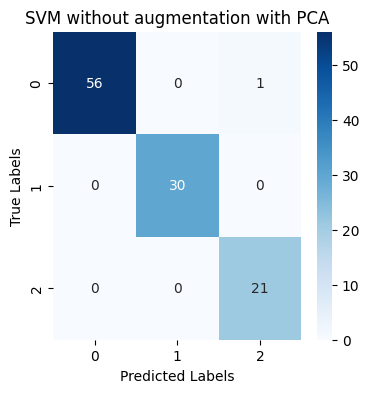

In [57]:
confusion_mat = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM without augmentation with PCA')
plt.show()

In [60]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Sample class labels
class_labels = ['benign', 'malignant', 'normal']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels
encoded_labels = label_encoder.fit_transform(class_labels)

print("Original class labels:", class_labels)
print("Encoded labels:", encoded_labels)


Original class labels: ['benign', 'malignant', 'normal']
Encoded labels: [0 1 2]


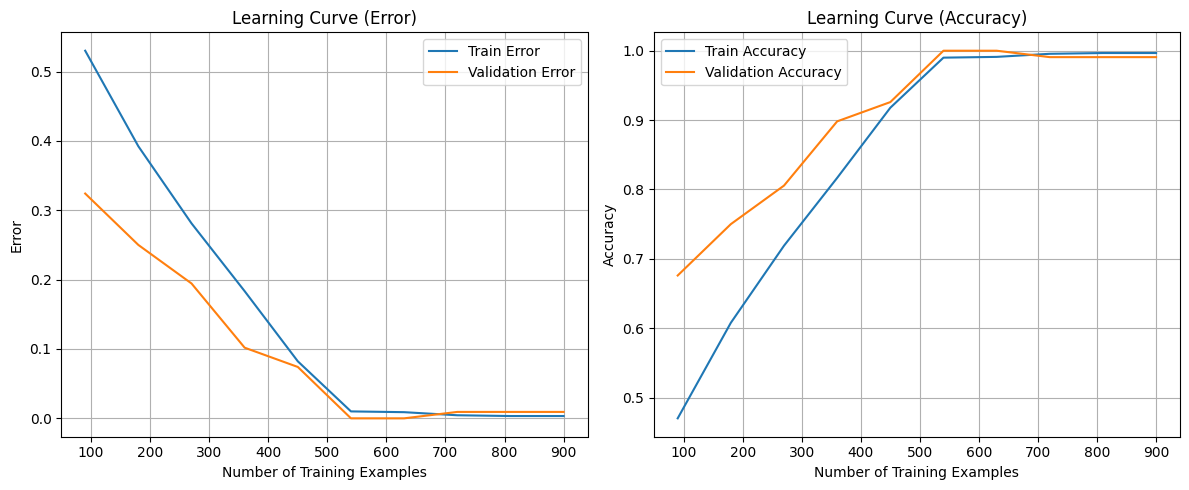

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming X_train_pca, X_val_pca, y_train, and y_val are your data
# and svm_classifier is your trained SVM model

train_sizes = np.linspace(0.1, 1.0, 10)  # Adjust as needed
train_errors = []
val_errors = []
train_accuracies = []
val_accuracies = []

for size in train_sizes:
    subset_idx = int(size * len(X_train_pca))
    subset_X = X_train_pca[:subset_idx]
    subset_y = y_resampled[:subset_idx]

    svm_classifier.fit(subset_X, subset_y)

    y_pred_train = svm_classifier.predict(X_train_pca)
    y_pred_val = svm_classifier.predict(X_val_pca)

    error_train = 1 - accuracy_score(y_resampled, y_pred_train)
    error_val = 1 - accuracy_score(y_test, y_pred_val)
    acc_train = accuracy_score(y_resampled, y_pred_train)
    acc_val = accuracy_score(y_test, y_pred_val)

    train_errors.append(error_train)
    val_errors.append(error_val)
    train_accuracies.append(acc_train)
    val_accuracies.append(acc_val)

plt.figure(figsize=(12, 5))

# Error Curve
plt.subplot(1, 2, 1)
plt.plot(train_sizes * len(X_train_pca), train_errors, label='Train Error')
plt.plot(train_sizes * len(X_train_pca), val_errors, label='Validation Error')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.title('Learning Curve (Error)')
plt.legend()
plt.grid()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes * len(X_train_pca), train_accuracies, label='Train Accuracy')
plt.plot(train_sizes * len(X_train_pca), val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
